# Necessary Packages


## Python Packages


In [1]:
from sympy import Max
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import pandas as pd
import pygris
import multiprocessing
from multiprocessing import get_context
from functools import partial

## EpyMoRPH Packages


In [2]:
from epymorph import *
from epymorph.compartment_model import *
from epymorph.initializer import single_location

from epymorph.geo import *
from epymorph.geo.geo import Geo
from epymorph.geo.adrio import adrio_maker_library
from epymorph.geo.adrio.census.adrio_census import CensusGeography, Granularity
from epymorph.util import pairwise_haversine, row_normalize
from epymorph.geo.cache import save_to_cache
from epymorph.geo.dynamic import DynamicGeo

from epymorph.geo.cache import load_from_cache

In [4]:
from intro_vignettes import state_info
from intro_vignettes import vaild_county_fips_codes
from intro_vignettes import get_state_details
from intro_vignettes import get_county_fips_codes
from intro_vignettes import map_user_data_by_state 
from intro_vignettes import map_user_data_by_county
from intro_vignettes import map_user_data_by_tract
from intro_vignettes import map_user_data_by_CBG

# Introduction to EpyMoRPH

<img src="drawio/EpyMoRPH.png" width="100%">


In epidemiology, simulation models are valuable tools for studying disease dynamics. EpyMoRPH is a framework that allows researchers to simulate disease spread using different modules. Here's a breakdown of the main components:

1. **Geo Model:** This component focuses on the geographical aspects of disease spread. It considers factors such as the size and layout of the population. The Geo Model helps researchers understand how diseases spread spatially and how interventions like vaccination campaigns can impact disease transmission.

2. **Movement Model:** The Movement Model simulates how individuals move within the population. This is crucial for understanding how diseases can spread from one location to another. Factors such as transportation networks, human mobility patterns, and travel restrictions are considered in this model. By incorporating real-world movement data, researchers can better predict the spread of diseases and evaluate the effectiveness of control measures.

3. **Inter-population Model:** This component deals with interactions between different populations. It considers factors such as commuting patterns and interactions between urban and rural areas. The Inter-population Model helps researchers understand how diseases can spread between different communities and how interventions in one population can impact neighboring populations.

The flexibility of EpyMoRPH lies in its ability to mix and match these modules. Researchers can combine different Geo, Movement, and Inter-population models to create custom simulations for specific diseases or scenarios. This versatility allows for a more comprehensive understanding of disease dynamics and can help inform public health strategies.


# Introduction to Geographical Models

<img src="drawio/Intro_to_Geo.png" width="100%">


The EpyMoRPH system follow the census hierarchy: Nation $\Rightarrow$ States $\Rightarrow$ Counties $\Rightarrow$ Census Tracts $\Rightarrow$ Census Block Groups

All these will fit perfectly into each other spitial scales.

For example:

The United States consists of 50 individual states. Each state comprises a varying number of counties. Each county is further divided into census tracts, and each census tract is composed of census block groups.

We refer to this as spitial scale of our Geographcial model.

It should be noted that data availability also depend on spitial scales.


# Intro to State Level GEO


| States        | Abbreviations | Population in 2020 | FIPS Code | States         | Abbreviations | Population in 2020 | FIPS Code |
| ------------- | ------------- | ------------------ | --------- | -------------- | ------------- | ------------------ | --------- |
| Alabama       | AL            | 5,024,279          | 01        | Montana        | MT            | 1,084,225          | 30        |
| Alaska        | AK            | 731,545            | 02        | Nebraska       | NE            | 1,961,504          | 31        |
| Arizona       | AZ            | 7,151,502          | 04        | Nevada         | NV            | 3,138,259          | 32        |
| Arkansas      | AR            | 3,011,524          | 05        | New Hampshire  | NH            | 1,377,529          | 33        |
| California    | CA            | 39,538,223         | 06        | New Jersey     | NJ            | 9,288,994          | 34        |
| Colorado      | CO            | 5,773,714          | 08        | New Mexico     | NM            | 2,117,522          | 35        |
| Connecticut   | CT            | 3,605,944          | 09        | New York       | NY            | 20,201,249         | 36        |
| Delaware      | DE            | 989,948            | 10        | North Carolina | NC            | 10,439,388         | 37        |
| Florida       | FL            | 21,733,312         | 12        | North Dakota   | ND            | 779,094            | 38        |
| Georgia       | GA            | 10,711,908         | 13        | Ohio           | OH            | 11,799,448         | 39        |
| Hawaii        | HI            | 1,455,271          | 15        | Oklahoma       | OK            | 3,956,971          | 40        |
| Idaho         | ID            | 1,839,106          | 16        | Oregon         | OR            | 4,237,256          | 41        |
| Illinois      | IL            | 12,812,508         | 17        | Pennsylvania   | PA            | 13,002,700         | 42        |
| Indiana       | IN            | 6,785,528          | 18        | Rhode Island   | RI            | 1,097,379          | 44        |
| Iowa          | IA            | 3,190,369          | 19        | South Carolina | SC            | 5,118,425          | 45        |
| Kansas        | KS            | 2,937,880          | 20        | South Dakota   | SD            | 903,027            | 46        |
| Kentucky      | KY            | 4,505,836          | 21        | Tennessee      | TN            | 6,944,975          | 47        |
| Louisiana     | LA            | 4,657,757          | 22        | Texas          | TX            | 29,145,505         | 48        |
| Maine         | ME            | 1,362,359          | 23        | Utah           | UT            | 3,271,616          | 49        |
| Maryland      | MD            | 6,177,224          | 24        | Vermont        | VT            | 643,503            | 50        |
| Massachusetts | MA            | 7,029,917          | 25        | Virginia       | VA            | 8,631,393          | 51        |
| Michigan      | MI            | 10,077,331         | 26        | Washington     | WA            | 7,705,281          | 53        |
| Minnesota     | MN            | 5,706,494          | 27        | West Virginia  | WV            | 1,793,716          | 54        |
| Mississippi   | MS            | 2,961,279          | 28        | Wisconsin      | WI            | 5,893,718          | 55        |
| Missouri      | MO            | 6,154,913          | 29        | Wyoming        | WY            | 576,851            | 56        |


In [5]:
state_details = get_state_details(state_info)
print(state_details)

['04', '35', '49', '08']


nodes: 4
name: ['Arizona' 'Colorado' 'New Mexico' 'Utah']
population: [7174064 5684926 2097021 3151239]


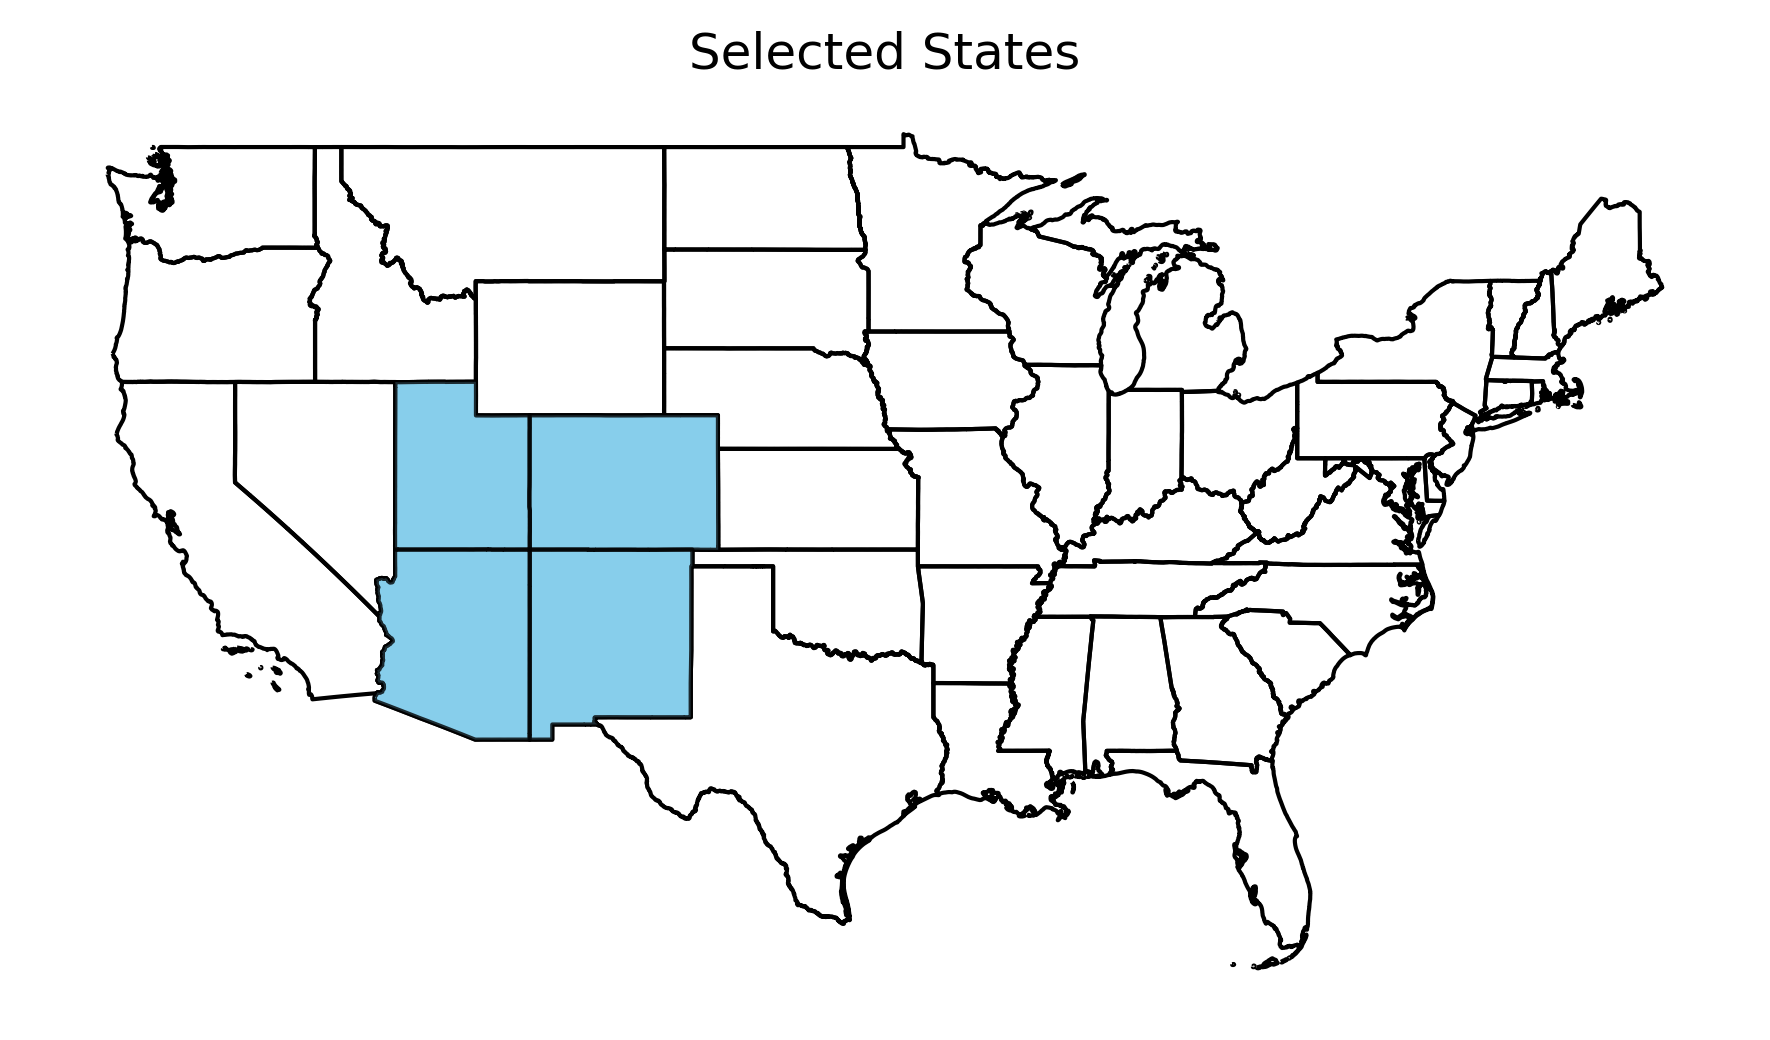

In [6]:
spec = DynamicGeoSpec(
    attributes=[
        AttribDef('label', np.str_, Shapes.N),
        AttribDef('geoid', np.str_, Shapes.N),
        AttribDef('centroid', CentroidDType, Shapes.N),
        AttribDef('population', np.int64, Shapes.N),
        AttribDef('median_income', np.int64, Shapes.N),
        AttribDef('commuters', np.int64, Shapes.NxN),
    ],
    time_period=Year(2020),
    geography=CensusGeography(
        granularity=Granularity.STATE,
        filter={
            'state': state_details,
            'county': ['*'],
            'tract': ['*'],
            'block group': ['*'],
        }),
    source={
        'label': 'Census:name',
        'geoid': 'Census',
        'centroid': 'Census',
        'population': 'Census',
        'median_income': 'Census',
        'commuters': 'Census',
    }
)

geo = DynamicGeo.from_library(spec, adrio_maker_library)

geo.fetch_all()

print(f"nodes: {geo.nodes}")
print(f"name: {geo['label']}")
print(f"population: {geo['population']}")

save_to_cache(geo, 'demo-States')

map_user_data_by_state(
    geo=geo,
    title='Selected States',
    cmap='skyblue',
)

# Introduction to County Level GEO

| County     | Population in 2019 | FIPS Code |
| ---------- | ------------------ | --------- |
| Apache     | 71,162             | 04001     |
| Cochise    | 125,922            | 04003     |
| Coconino   | 148,336            | 04005     |
| Gila       | 54,018             | 04007     |
| Graham     | 39,155             | 04009     |
| Greenlee   | 9,770              | 04011     |
| La Paz     | 21,108             | 04012     |
| Maricopa   | 4,485,414          | 04013     |
| Mohave     | 233,260            | 04015     |
| Navajo     | 108,956            | 04017     |
| Pima       | 1,047,279          | 04019     |
| Pinal      | 479,399            | 04021     |
| Santa Cruz | 47,420             | 04023     |
| Yavapai    | 235,099            | 04025     |
| Yuma       | 226,706            | 04027     |


In [7]:
county_fips_codes = get_county_fips_codes(vaild_county_fips_codes)
print(county_fips_codes)

['001', '003', '005', '007', '009', '011', '012', '013', '015', '017', '019', '021', '023', '025', '027']


nodes: 15
label: ['Apache County, Arizona' 'Cochise County, Arizona'
 'Coconino County, Arizona' 'Gila County, Arizona'
 'Graham County, Arizona']
population: [ 71714 126442 142254  53846  38304]


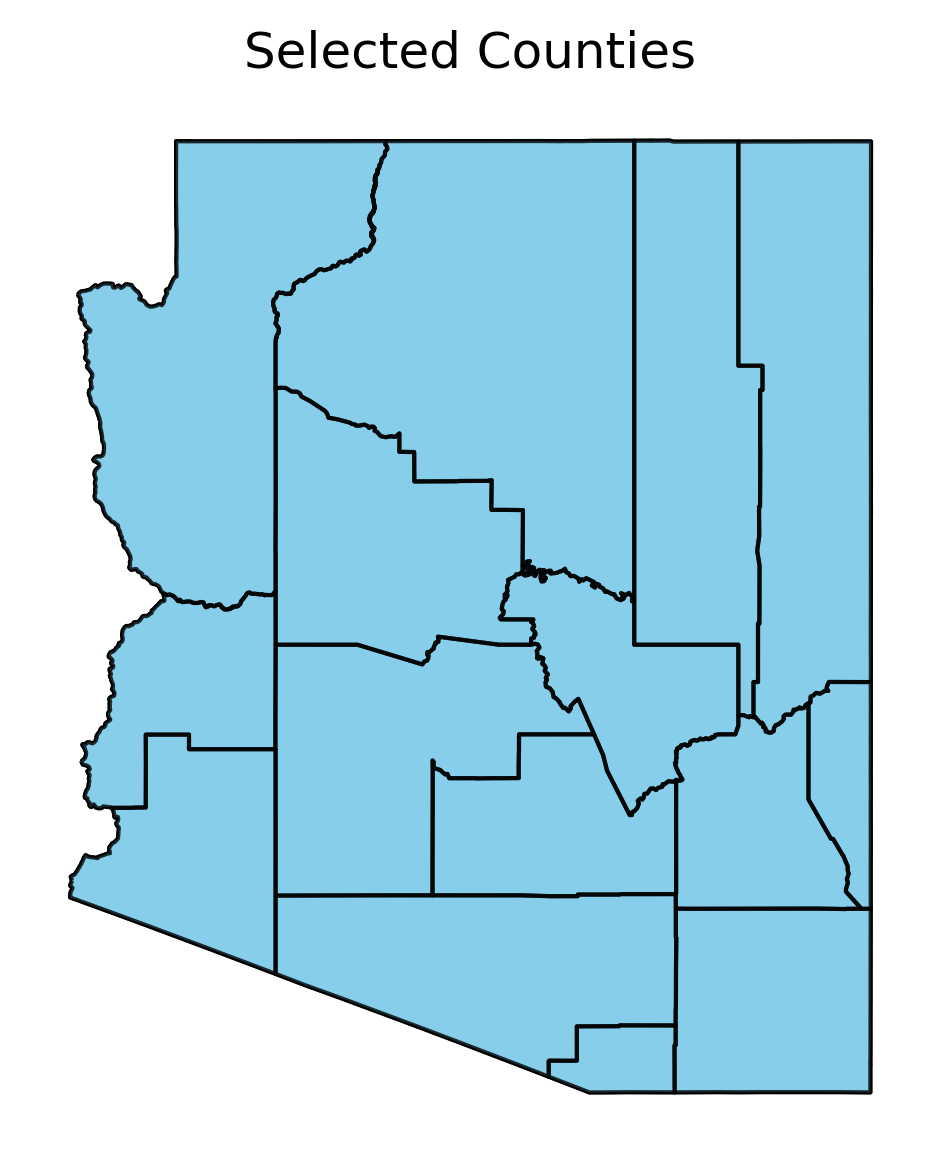

In [8]:
spec = DynamicGeoSpec(
    attributes=[
        AttribDef('label', np.str_, Shapes.N),
        AttribDef('geoid', np.str_, Shapes.N),
        AttribDef('centroid', CentroidDType, Shapes.N),
        AttribDef('population', np.int64, Shapes.N),
        AttribDef('median_income', np.int64, Shapes.N),
        AttribDef('commuters', np.int64, Shapes.NxN),
    ],
    time_period=Year(2020),
    geography=CensusGeography(
        granularity=Granularity.COUNTY,  # <-- This is the only line we need to change!
        filter={
            'state': ['04'],  # AZ, NM, CO, UT
            'county': county_fips_codes,
            'tract': ['*'],
            'block group': ['*'],
        }),
    source={
        'label': 'Census:name',
        'geoid': 'Census',
        'centroid': 'Census',
        'population': 'Census',
        'median_income': 'Census',
        'commuters': 'Census',
    }
)

geo = DynamicGeo.from_library(spec, adrio_maker_library)

geo.fetch_all()

print(f"nodes: {geo.nodes}")
print(f"label: {geo['label'][0:5]}")
print(f"population: {geo['population'][0:5]}")

save_to_cache(geo, 'demo-Counties')

map_user_data_by_county(
    geo=geo,
    title='Selected Counties',
    cmap='skyblue',
)

# Introduction to Census Tract Level GEO


nodes: 1009
label: ['Census Tract 101.02, Maricopa County, Arizona'
 'Census Tract 101.03, Maricopa County, Arizona'
 'Census Tract 101.04, Maricopa County, Arizona'
 'Census Tract 304.01, Maricopa County, Arizona'
 'Census Tract 304.02, Maricopa County, Arizona']
population: [5353 3096 2511 5250 3840]
Using FIPS code '04' for input 'AZ'
Using FIPS code '013' for input 'Maricopa'


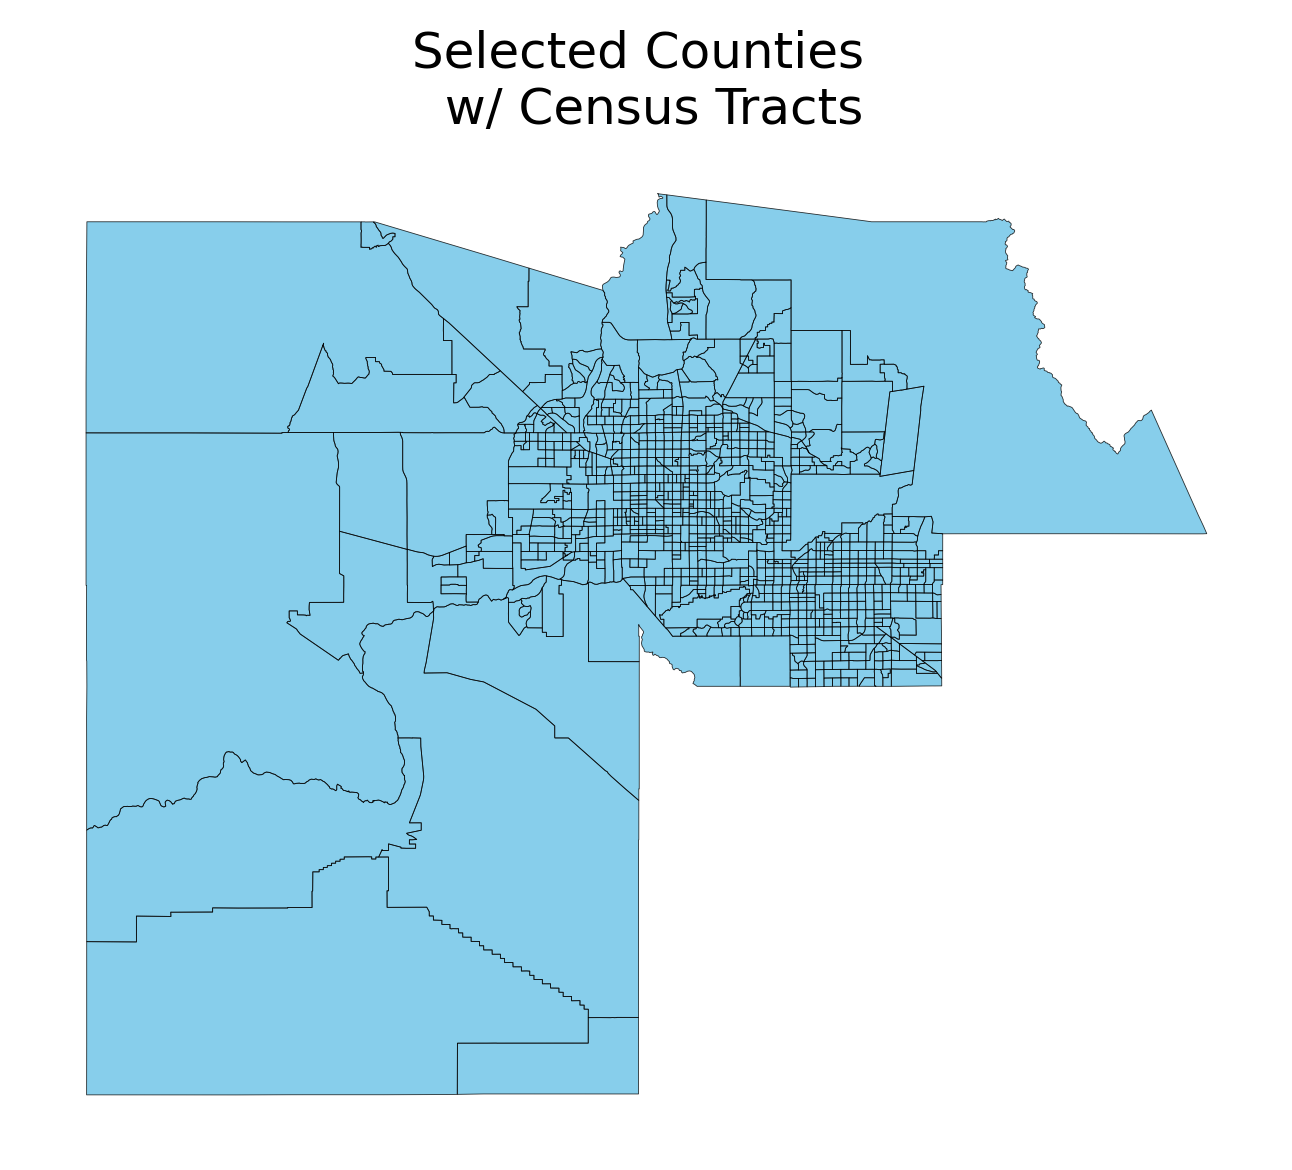

In [9]:
spec = DynamicGeoSpec(
    attributes=[
        AttribDef('label', np.str_, Shapes.N),
        AttribDef('geoid', np.str_, Shapes.N),
        AttribDef('centroid', CentroidDType, Shapes.N),
        AttribDef('population', np.int64, Shapes.N),
        AttribDef('median_income', np.int64, Shapes.N),
    ],
    time_period=Year(2020),
    geography=CensusGeography(
        granularity=Granularity.TRACT,  # <-- This is the only line we need to change!
        filter={
            'state': ['04'],  # AZ, NM, CO, UT
            'county': ['013'],
            'tract': ['*'],
            'block group': ['*'],
        }),
    source={
        'label': 'Census:name',
        'geoid': 'Census',
        'centroid': 'Census',
        'population': 'Census',
        'median_income': 'Census',
    }
)

geo = DynamicGeo.from_library(spec, adrio_maker_library)

geo.fetch_all()

# Let's inspect a few values...
print(f"nodes: {geo.nodes}")
print(f"label: {geo['label'][0:5]}")
print(f"population: {geo['population'][0:5]}")

save_to_cache(geo, 'demo-Tracts')

map_user_data_by_tract(
    geo=geo,
    title='Selected Counties \n w/ Census Tracts',
    cmap='skyblue',
)

# Introduction to Census Block Groups Level GEO


nodes: 2806
label: ['Block Group 1, Census Tract 101.02, Maricopa County, Arizona'
 'Block Group 2, Census Tract 101.02, Maricopa County, Arizona'
 'Block Group 3, Census Tract 101.02, Maricopa County, Arizona'
 'Block Group 1, Census Tract 101.03, Maricopa County, Arizona'
 'Block Group 2, Census Tract 101.03, Maricopa County, Arizona']
population: [1004 1622 2727 1262 1834]
Using FIPS code '04' for input 'AZ'
Using FIPS code '013' for input 'Maricopa'


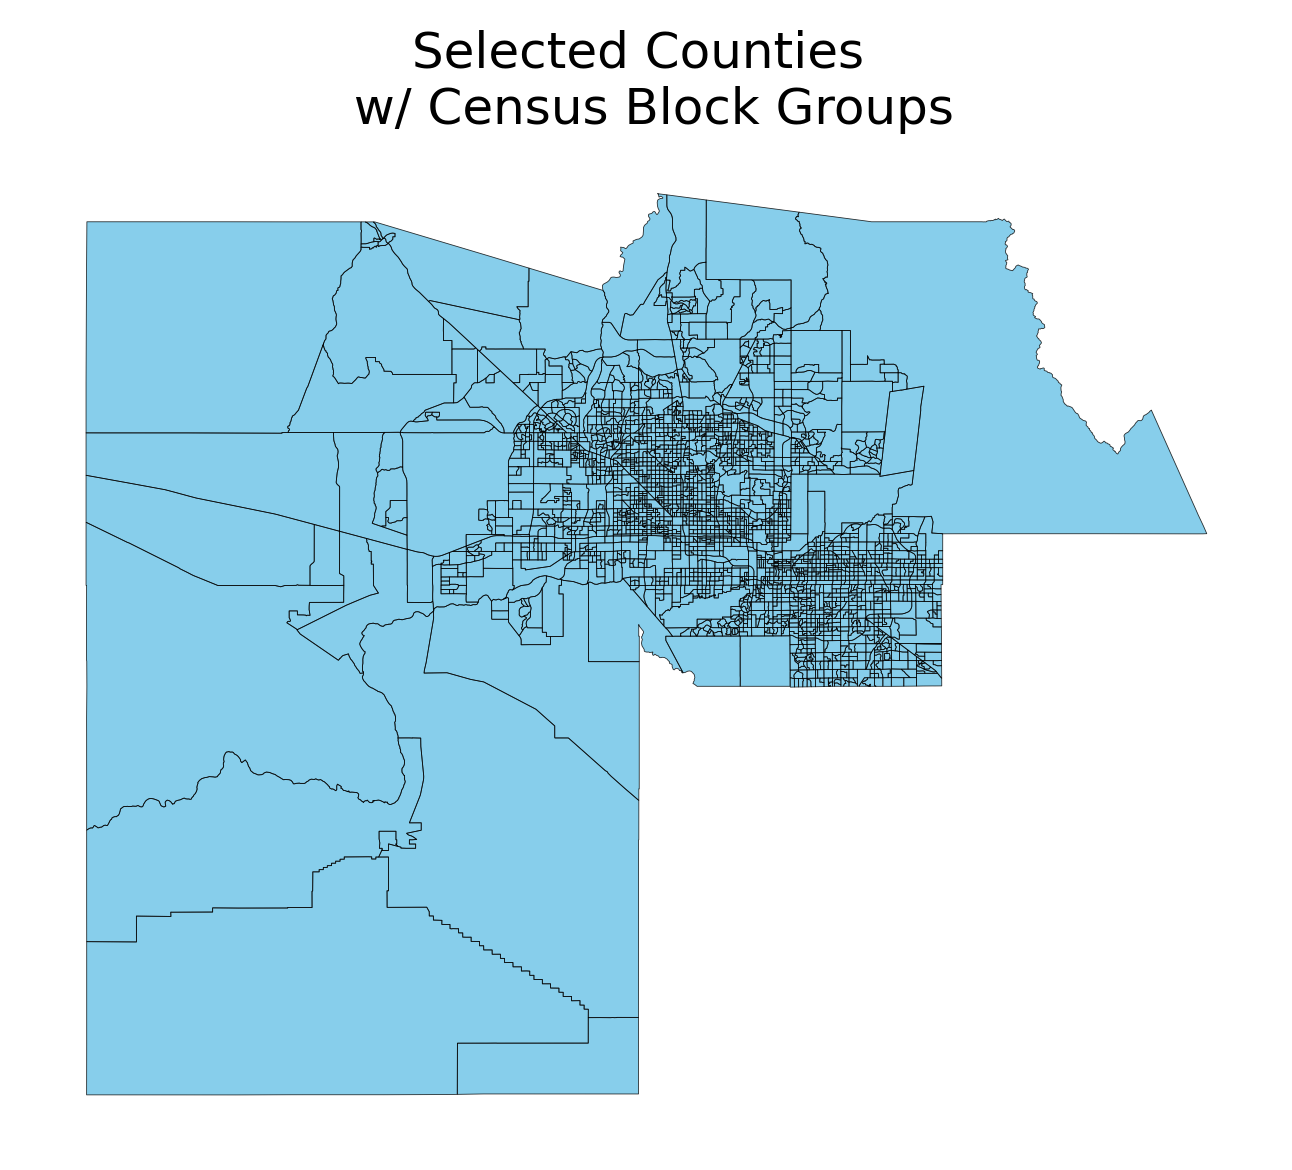

In [10]:
spec = DynamicGeoSpec(
    attributes=[
        AttribDef('label', np.str_, Shapes.N),
        AttribDef('geoid', np.str_, Shapes.N),
        AttribDef('centroid', CentroidDType, Shapes.N),
        AttribDef('population', np.int64, Shapes.N),
        AttribDef('median_income', np.int64, Shapes.N),
    ],
    time_period=Year(2020),
    geography=CensusGeography(
        granularity=Granularity.CBG,  # <-- This is the only line we need to change!
        filter={
            'state': ['04'],  # AZ, NM, CO, UT
            'county': ['013'],
            'tract': ['*'],
            'block group': ['*'],
        }),
    source={
        'label': 'Census:name',
        'geoid': 'Census',
        'centroid': 'Census',
        'population': 'Census',
        'median_income': 'Census',
    }
)

geo = DynamicGeo.from_library(spec, adrio_maker_library)

geo.fetch_all()

print(f"nodes: {geo.nodes}")
print(f"label: {geo['label'][0:5]}")
print(f"population: {geo['population'][0:5]}")

save_to_cache(geo, 'demo-CBG')

map_user_data_by_CBG(
    geo=geo,
    title='Selected Counties \n w/ Census Block Groups',
    cmap='skyblue',
)

# Introduction to Movement Models


In [11]:
spatial_level = input('Select States, Counties, Tracts, or CBG: ')
def load_example_geo() -> Geo:
    geo = load_from_cache(f'demo-{spatial_level}')
    if geo is None:
        msg = f'Can not load the demo-{spatial_level}.'
        raise Exception(msg)
    return geo

geo = load_example_geo()

In [12]:
state_fips = {s[:2] for s in geo['geoid']}

# Find a random index in the geo
indices = geo['geoid'] 
MARICOPA_CO_IDX = np.random.choice(len(indices))

In [20]:
params = {
    'phi': 4.0,
}

def calc_centroids_kernel():
    centroid = geo['centroid']
    distance = pairwise_haversine(centroid['longitude'], centroid['latitude'])
    return row_normalize(1 / np.exp(distance / params['phi']))


centroids_kernel = calc_centroids_kernel()

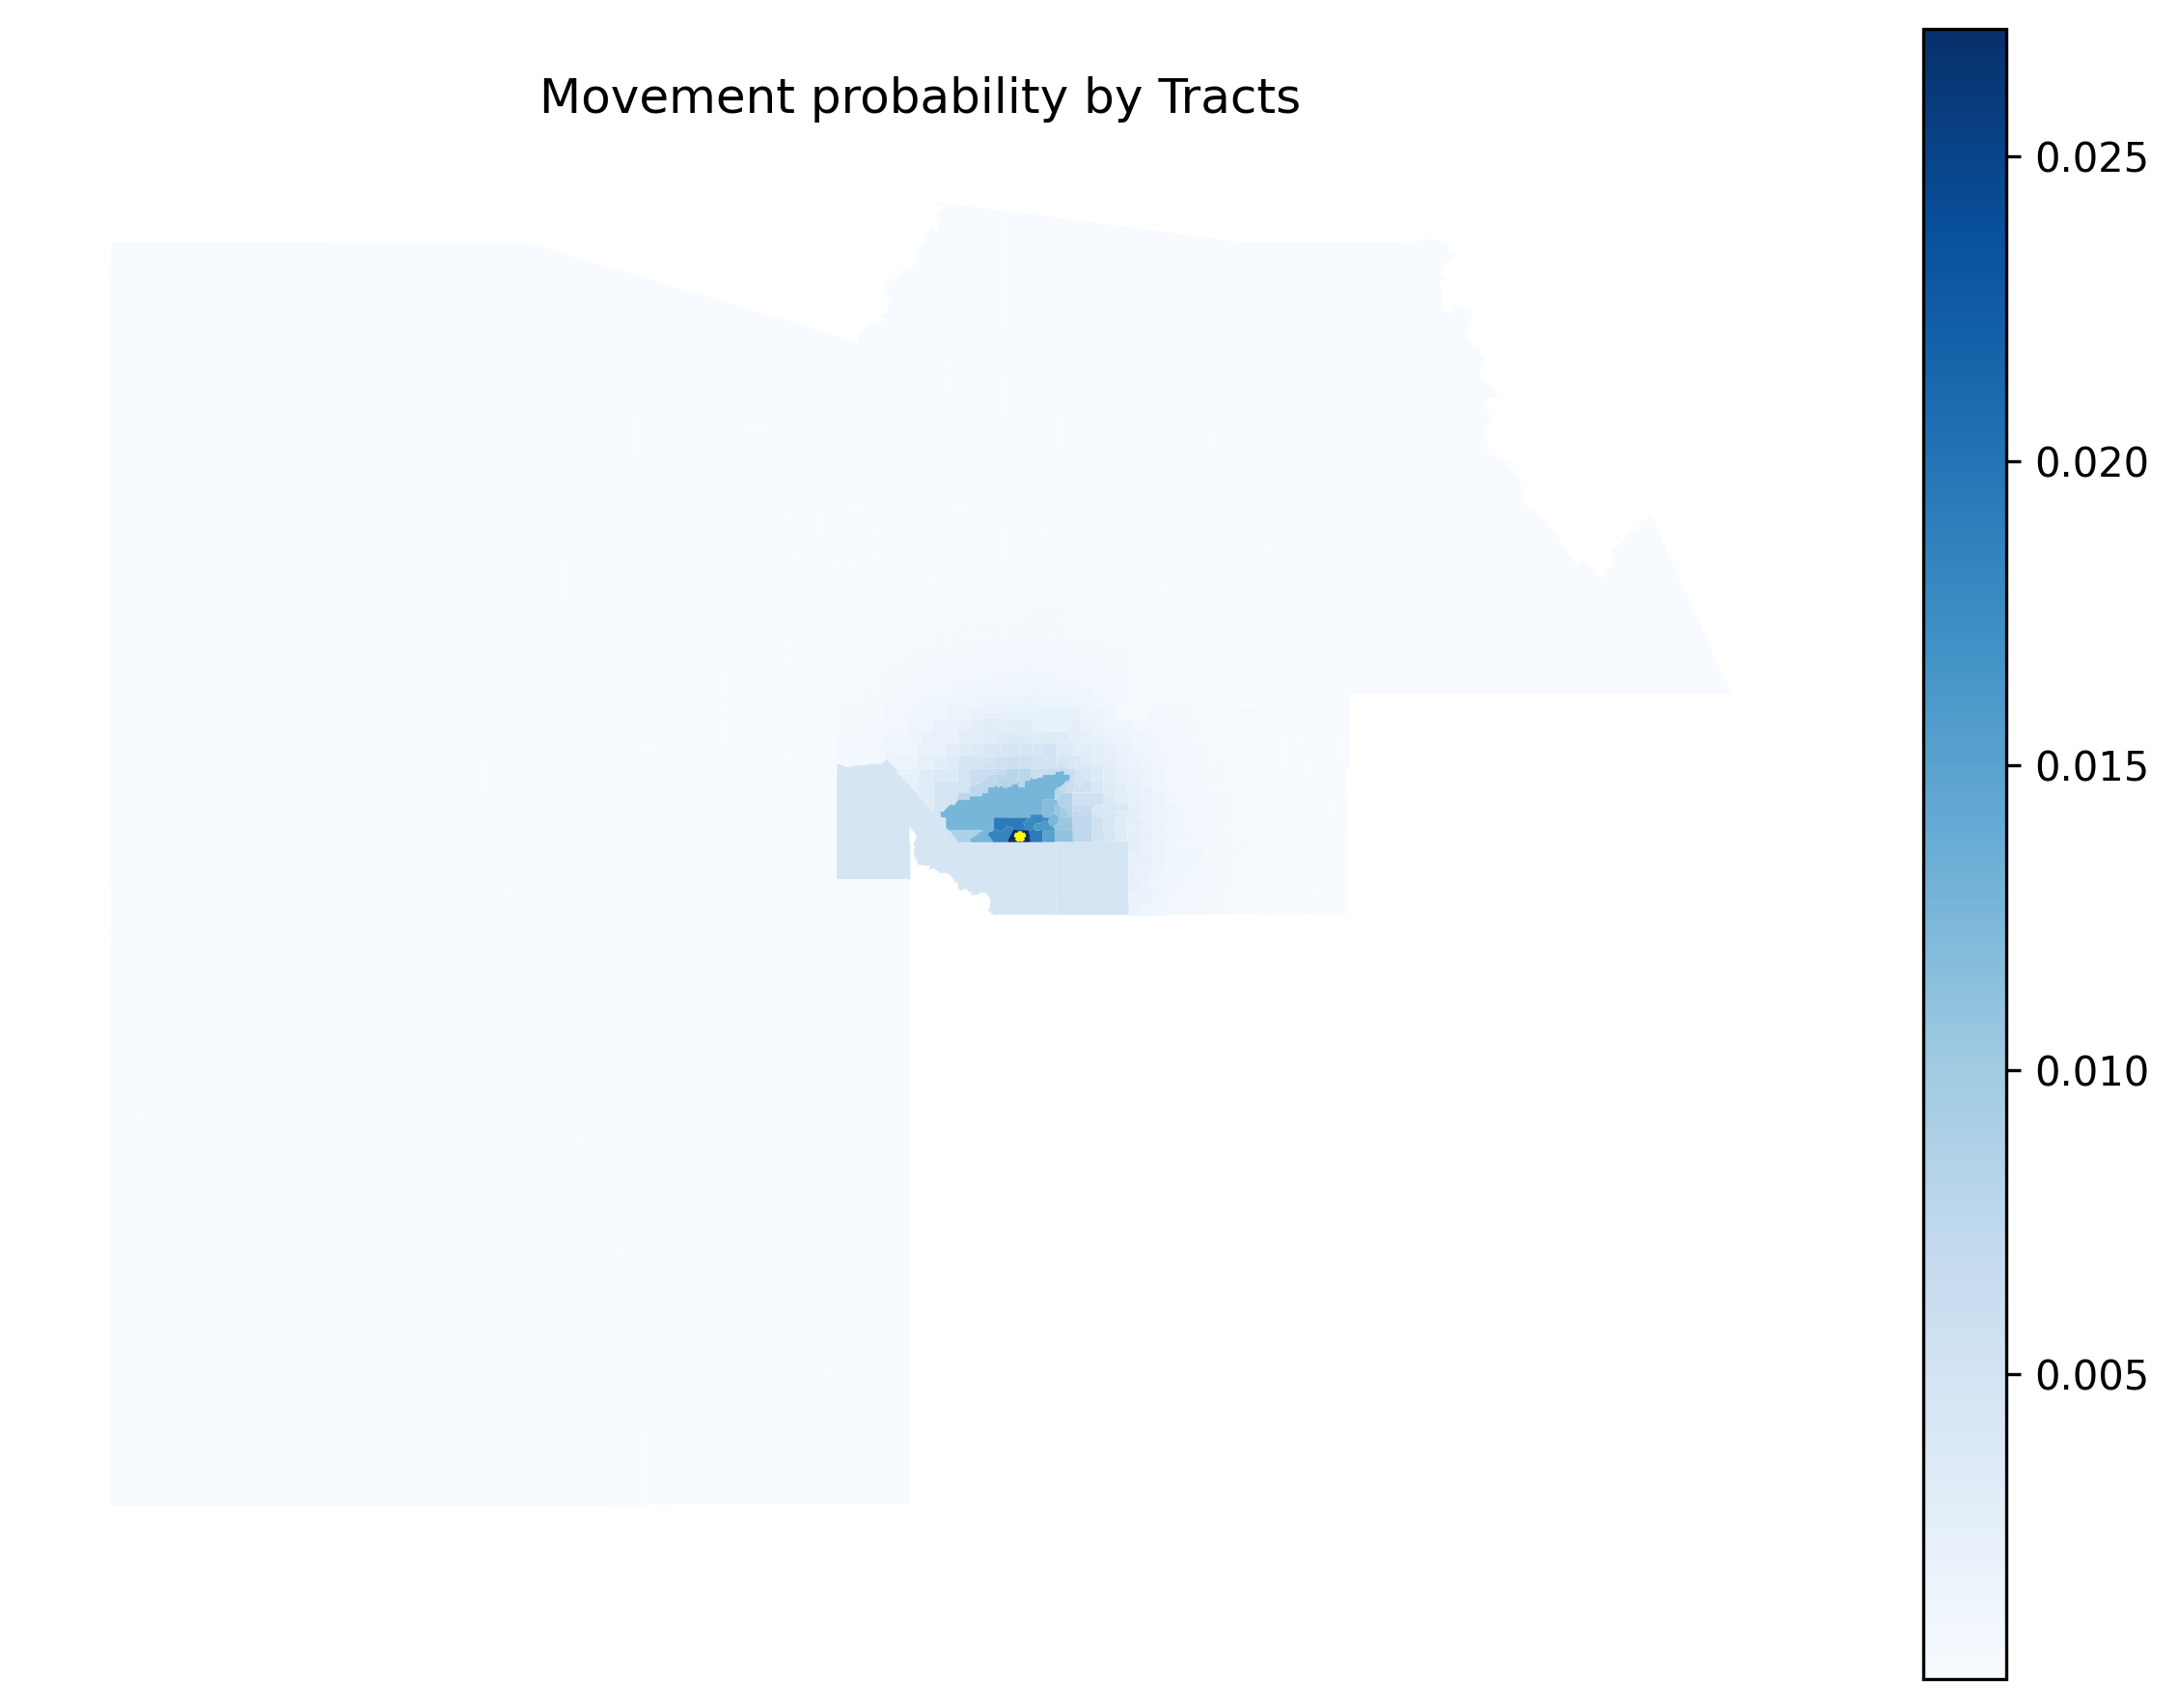

In [21]:
df_states = pygris.states(cb=True, resolution='5m', cache=True, year=2020)
df_states = df_states.loc[df_states['GEOID'].isin(state_fips)]

if spatial_level == 'States':
    df_spatial_levels = df_states.loc[df_states['GEOID'].isin(state_fips)]
elif spatial_level == 'Counties':
    df_spatial_levels = pd.concat([
        pygris.counties(state=s, cb=True, resolution='5m', cache=True, year=2020)
        for s in state_fips
    ])
elif spatial_level == 'Tracts':
    df_spatial_levels = pd.concat([
        pygris.tracts(state=s, cb=True, cache=True, year=2020)
        for s in state_fips
    ])
elif spatial_level == 'CBG':
    df_spatial_levels = pd.concat([
        pygris.block_groups(state=s, cb=True, cache=True, year=2020)
        for s in state_fips
    ])
else:
    raise ValueError("Invalid spatial level. Please choose from 'Counties', 'Tracts', or 'CBG'.")


df_merged = pd.merge(
    on="GEOID",
    left=df_spatial_levels,
    right=pd.DataFrame({
        'GEOID': geo['geoid'],
        'data': centroids_kernel[MARICOPA_CO_IDX],
    }),
)

fig, ax = plt.subplots(figsize=(8, 6), dpi =300)
ax.axis('off')
ax.set_title(f"Movement probability by {spatial_level}")
df_merged.plot(ax=ax, column='data', cmap='Blues', legend=True)
origin = geo['centroid'][MARICOPA_CO_IDX]
ax.plot(origin[0], origin[1], marker='*', color='yellow', markersize=2.5)
fig.tight_layout()
plt.show()

# Introduction to Inter-Population Models


<img src="drawio/SIR.drawio.png" width="50%">

\begin{align*}
\frac{dS}{dt} & = \epsilon R - \beta \frac{SI}{N}, \\
\frac{dI}{dt} & = \beta \frac{SI}{N} - \gamma I, \\
\frac{dR}{dt} & = \gamma I - \epsilon R,
\end{align*}


In [53]:
def construct_ipm():
    symbols = create_symbols(
        compartments=[
            compartment('S'),
            compartment('I'),
            compartment('R'),
        ],
        attributes=[
            param('beta', shape=Shapes.TxN),
            param('gamma', shape=Shapes.TxN),
            param('xi', shape=Shapes.TxN),
        ])

    [S, I, R] = symbols.compartment_symbols
    [β, γ, ξ,] = symbols.attribute_symbols


    N = Max(1, S + I + R)

    return create_model(
        symbols=symbols,
        transitions=[
            edge(S, I, rate=β * S * I / N),
            edge(I, R, rate=γ * I),
            edge(R, S, rate=ξ * R),
        ]
    )


SIR_ipm = construct_ipm()

## Simulation


In [57]:
geo = load_from_cache('demo-tracts')

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-31 (150 days)
• 6 geo nodes
|####################| 100% 
Runtime: 0.226s


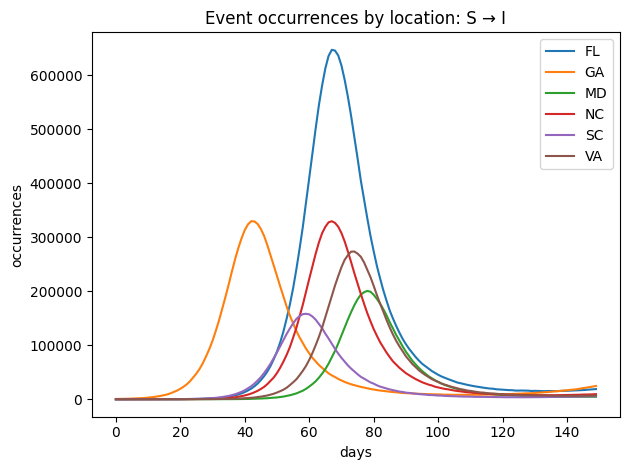

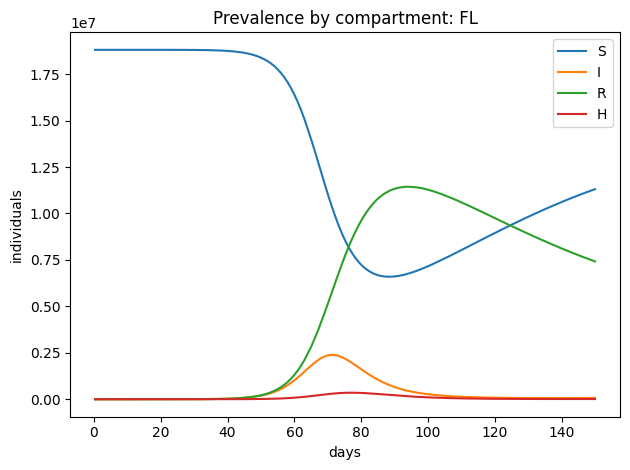

In [76]:
sirh_ipm = ipm_library['sirh']()
if geo is None:
    raise Exception("Oops, we need to cache the demo geo first (see above cell).")

sim = StandardSimulation(
    geo=geo_library['pei'](),
    ipm=ipm_library['sirh'](),
    mm=mm_library['pei'](),
    params={
        'beta': 0.45,
        'gamma': 0.25,
        'xi': 0.0111,
        'hospitalization_prob': 0.1,
        'hospitalization_duration': 7.0,
        'move_control': 0.9,
        'theta': 0.1,
        'phi': 40
    },
    time_frame=TimeFrame.of("2015-01-01", 150),
    # Initialize the infection in Maricopa County, Arizona with 10k individuals.
    initializer=partial(single_location, location=1, seed_size=1000)
)

with sim_messaging(sim):
    output = sim.run()

EVENT_S_TO_I = 0

plot_event(output, event_idx=EVENT_S_TO_I)
plot_pop(output, pop_idx=EVENT_S_TO_I)


# Multiple Simulatoins


In [61]:
cpu_25 = int(multiprocessing.cpu_count() * 0.25) # Using 2 CPU cores
cpu_50 = int(multiprocessing.cpu_count() * 0.50) # Using 4 CPU cores
cpu_75 = int(multiprocessing.cpu_count() * 0.75) # Using 6 CPU cores
cpu_100 = multiprocessing.cpu_count() # Using all CPU cores

In [109]:
def job(dummy_arg) -> list:
    phi = 40  # Hardcoded phi value
    sim = StandardSimulation(
        geo=geo_library['pei'](),
        ipm=ipm_library['sirs'](),
        mm=mm_library['centroids'](),
        params={
            'beta': 0.4,
            'gamma': 1 / 10,
            'xi': 1 / 90,
            'move_control': 0.9,
            'theta': 0.1,
            'phi': phi
        },
        time_frame=TimeFrame.of("2021-01-01", 150),
        initializer=partial(single_location, seed_size=1000, location=0),
    )

    output = sim.run()
    
    prevalence_array = []
    for i in range(150*2):
        sum_value = np.sum(output.prevalence[i, :, 1], axis=0)
        prevalence_array.append(sum_value)
    

    return prevalence_array

prevalence_arrays = []

p = get_context("fork").Pool(cpu_75)
results = p.map(job, [None]*100) 
p.close()

for result in results:
    prevalence_arrays.append(result)

percentiles = np.percentile(prevalence_arrays, [25, 50, 75], axis=0)

In [117]:
print("Shapes of percentiles:")
print(f"25th percentile shape: {percentiles[0].shape}")
print(f"Median percentile shape: {percentiles[1].shape}")
print(f"75th percentile shape: {percentiles[2].shape}")

Shapes of percentiles:
25th percentile shape: (300,)
Median percentile shape: (300,)
75th percentile shape: (300,)


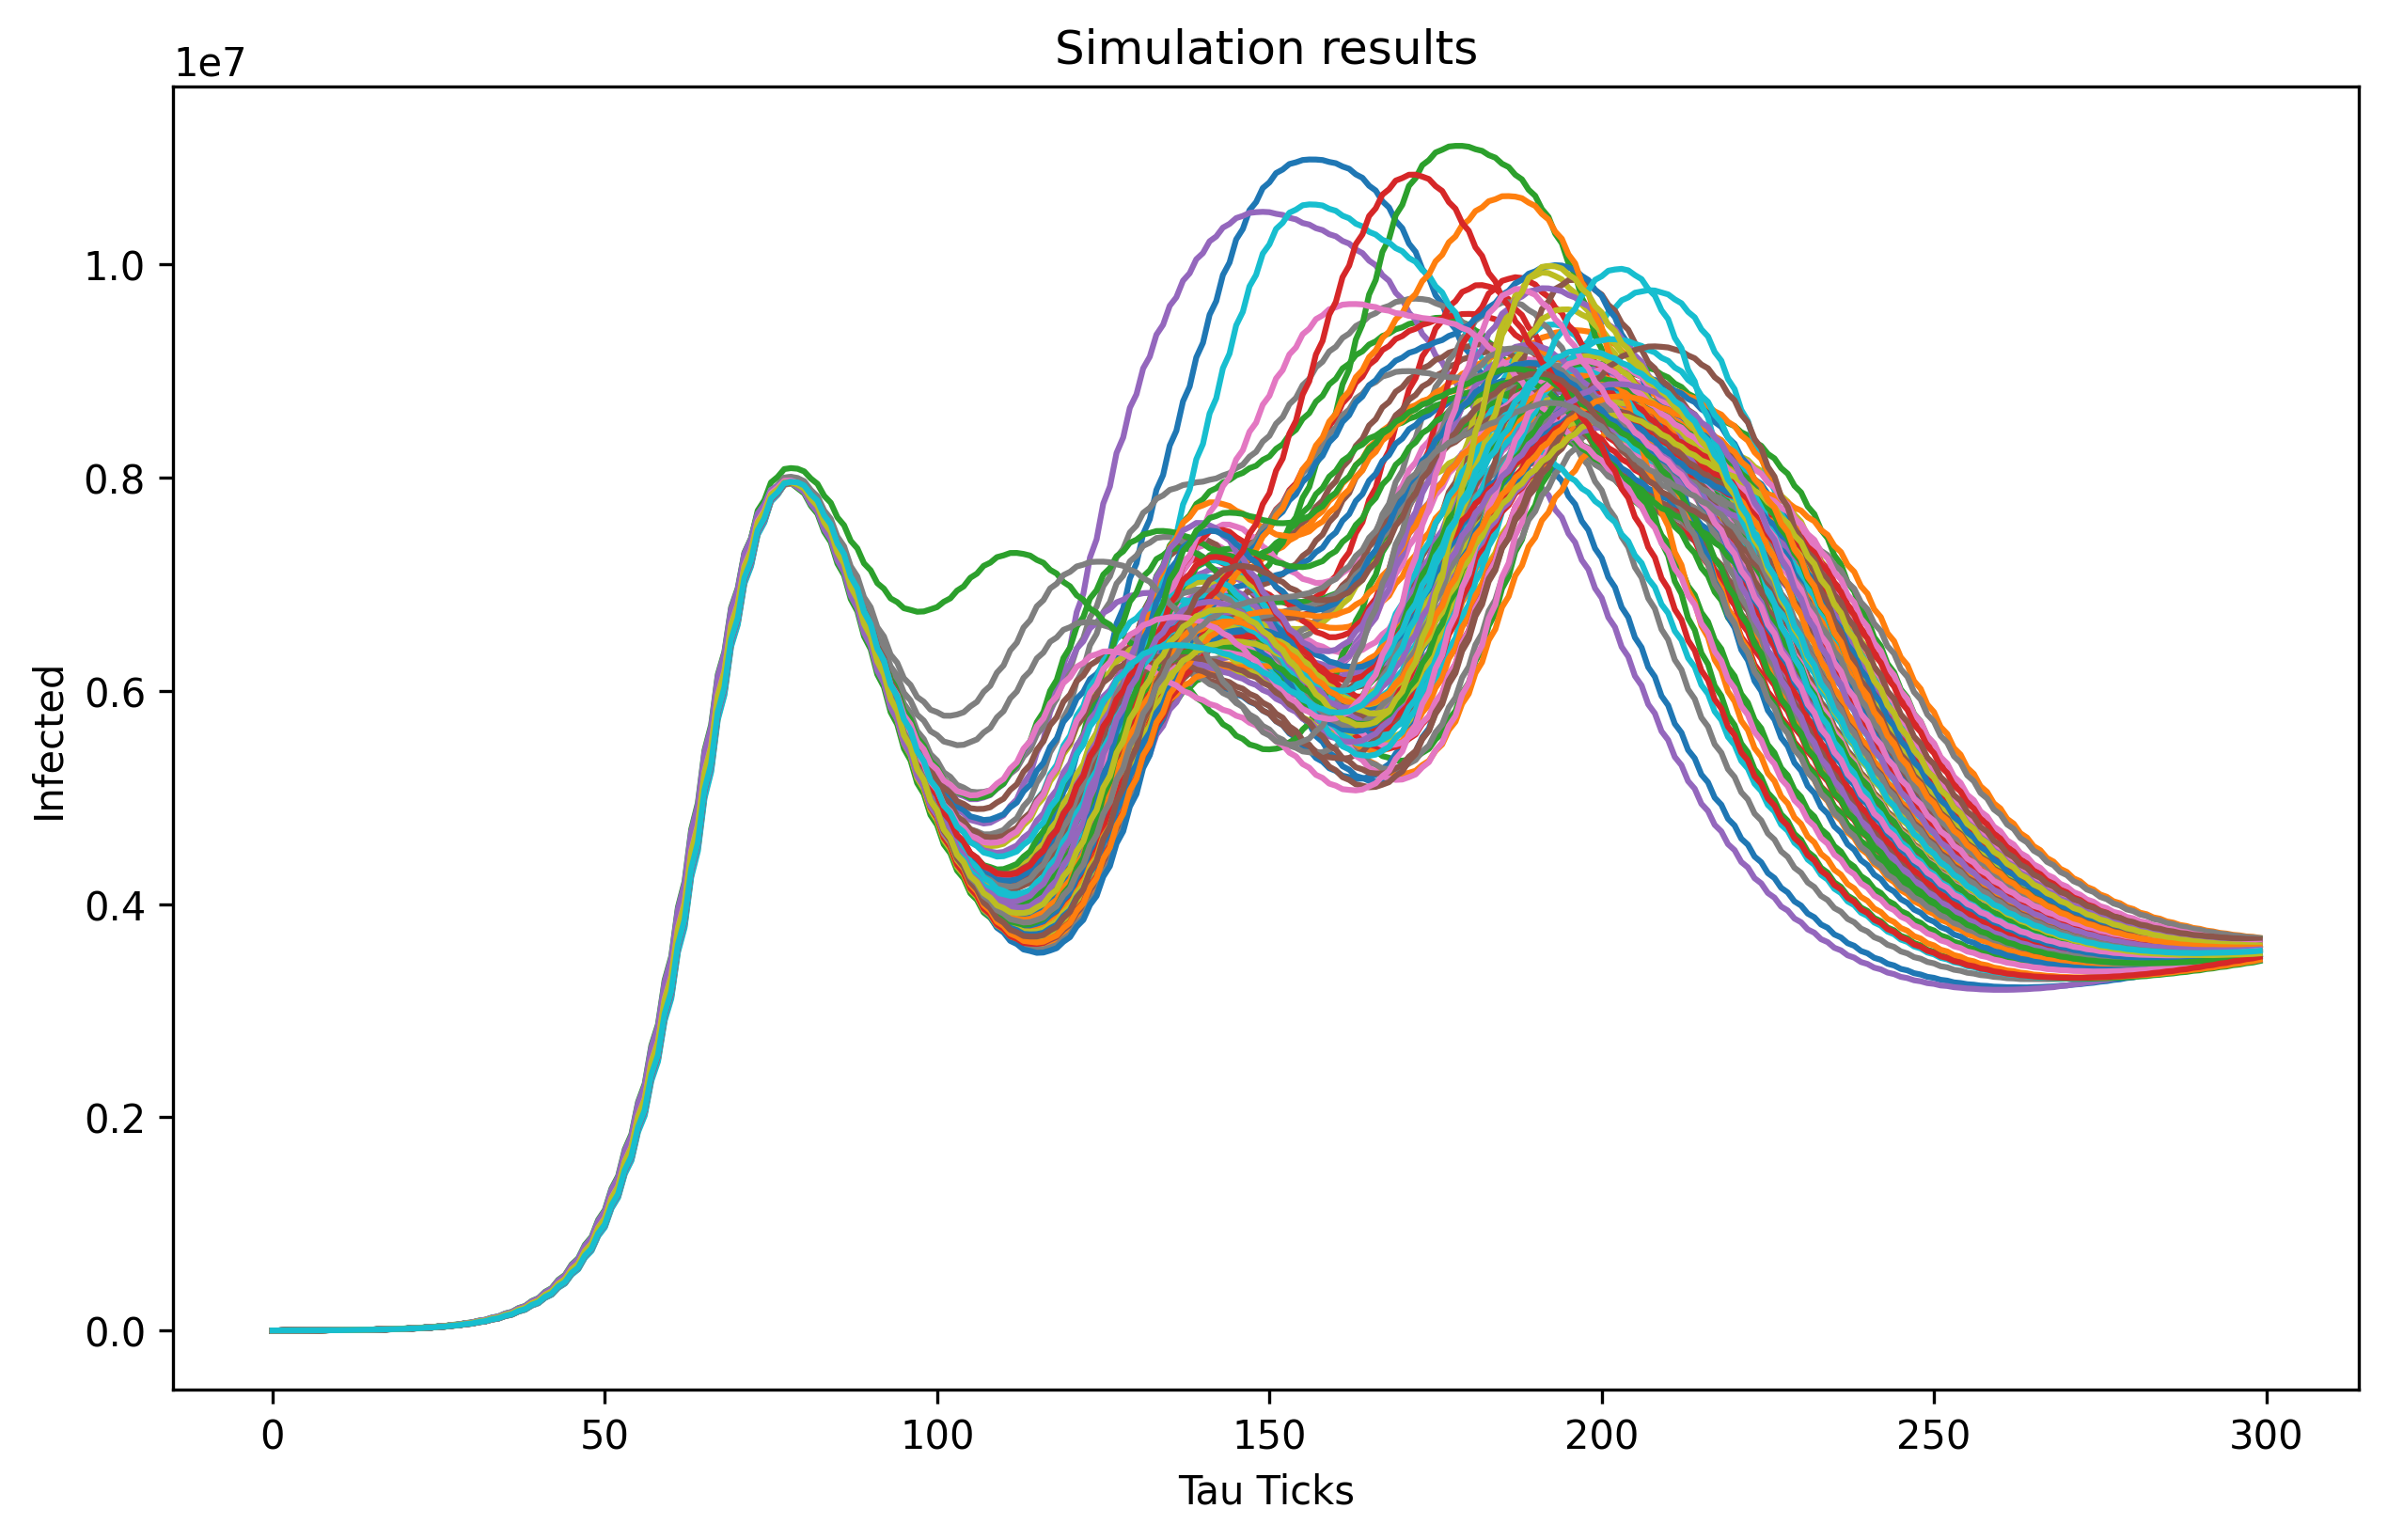

In [113]:
plt.figure(figsize=(10, 6), dpi=300)
for prevalence_array in prevalence_arrays:
    plt.plot(prevalence_array)
plt.xlabel('Tau Ticks')
plt.ylabel('Infected')
plt.title('Simulation results')
plt.show()

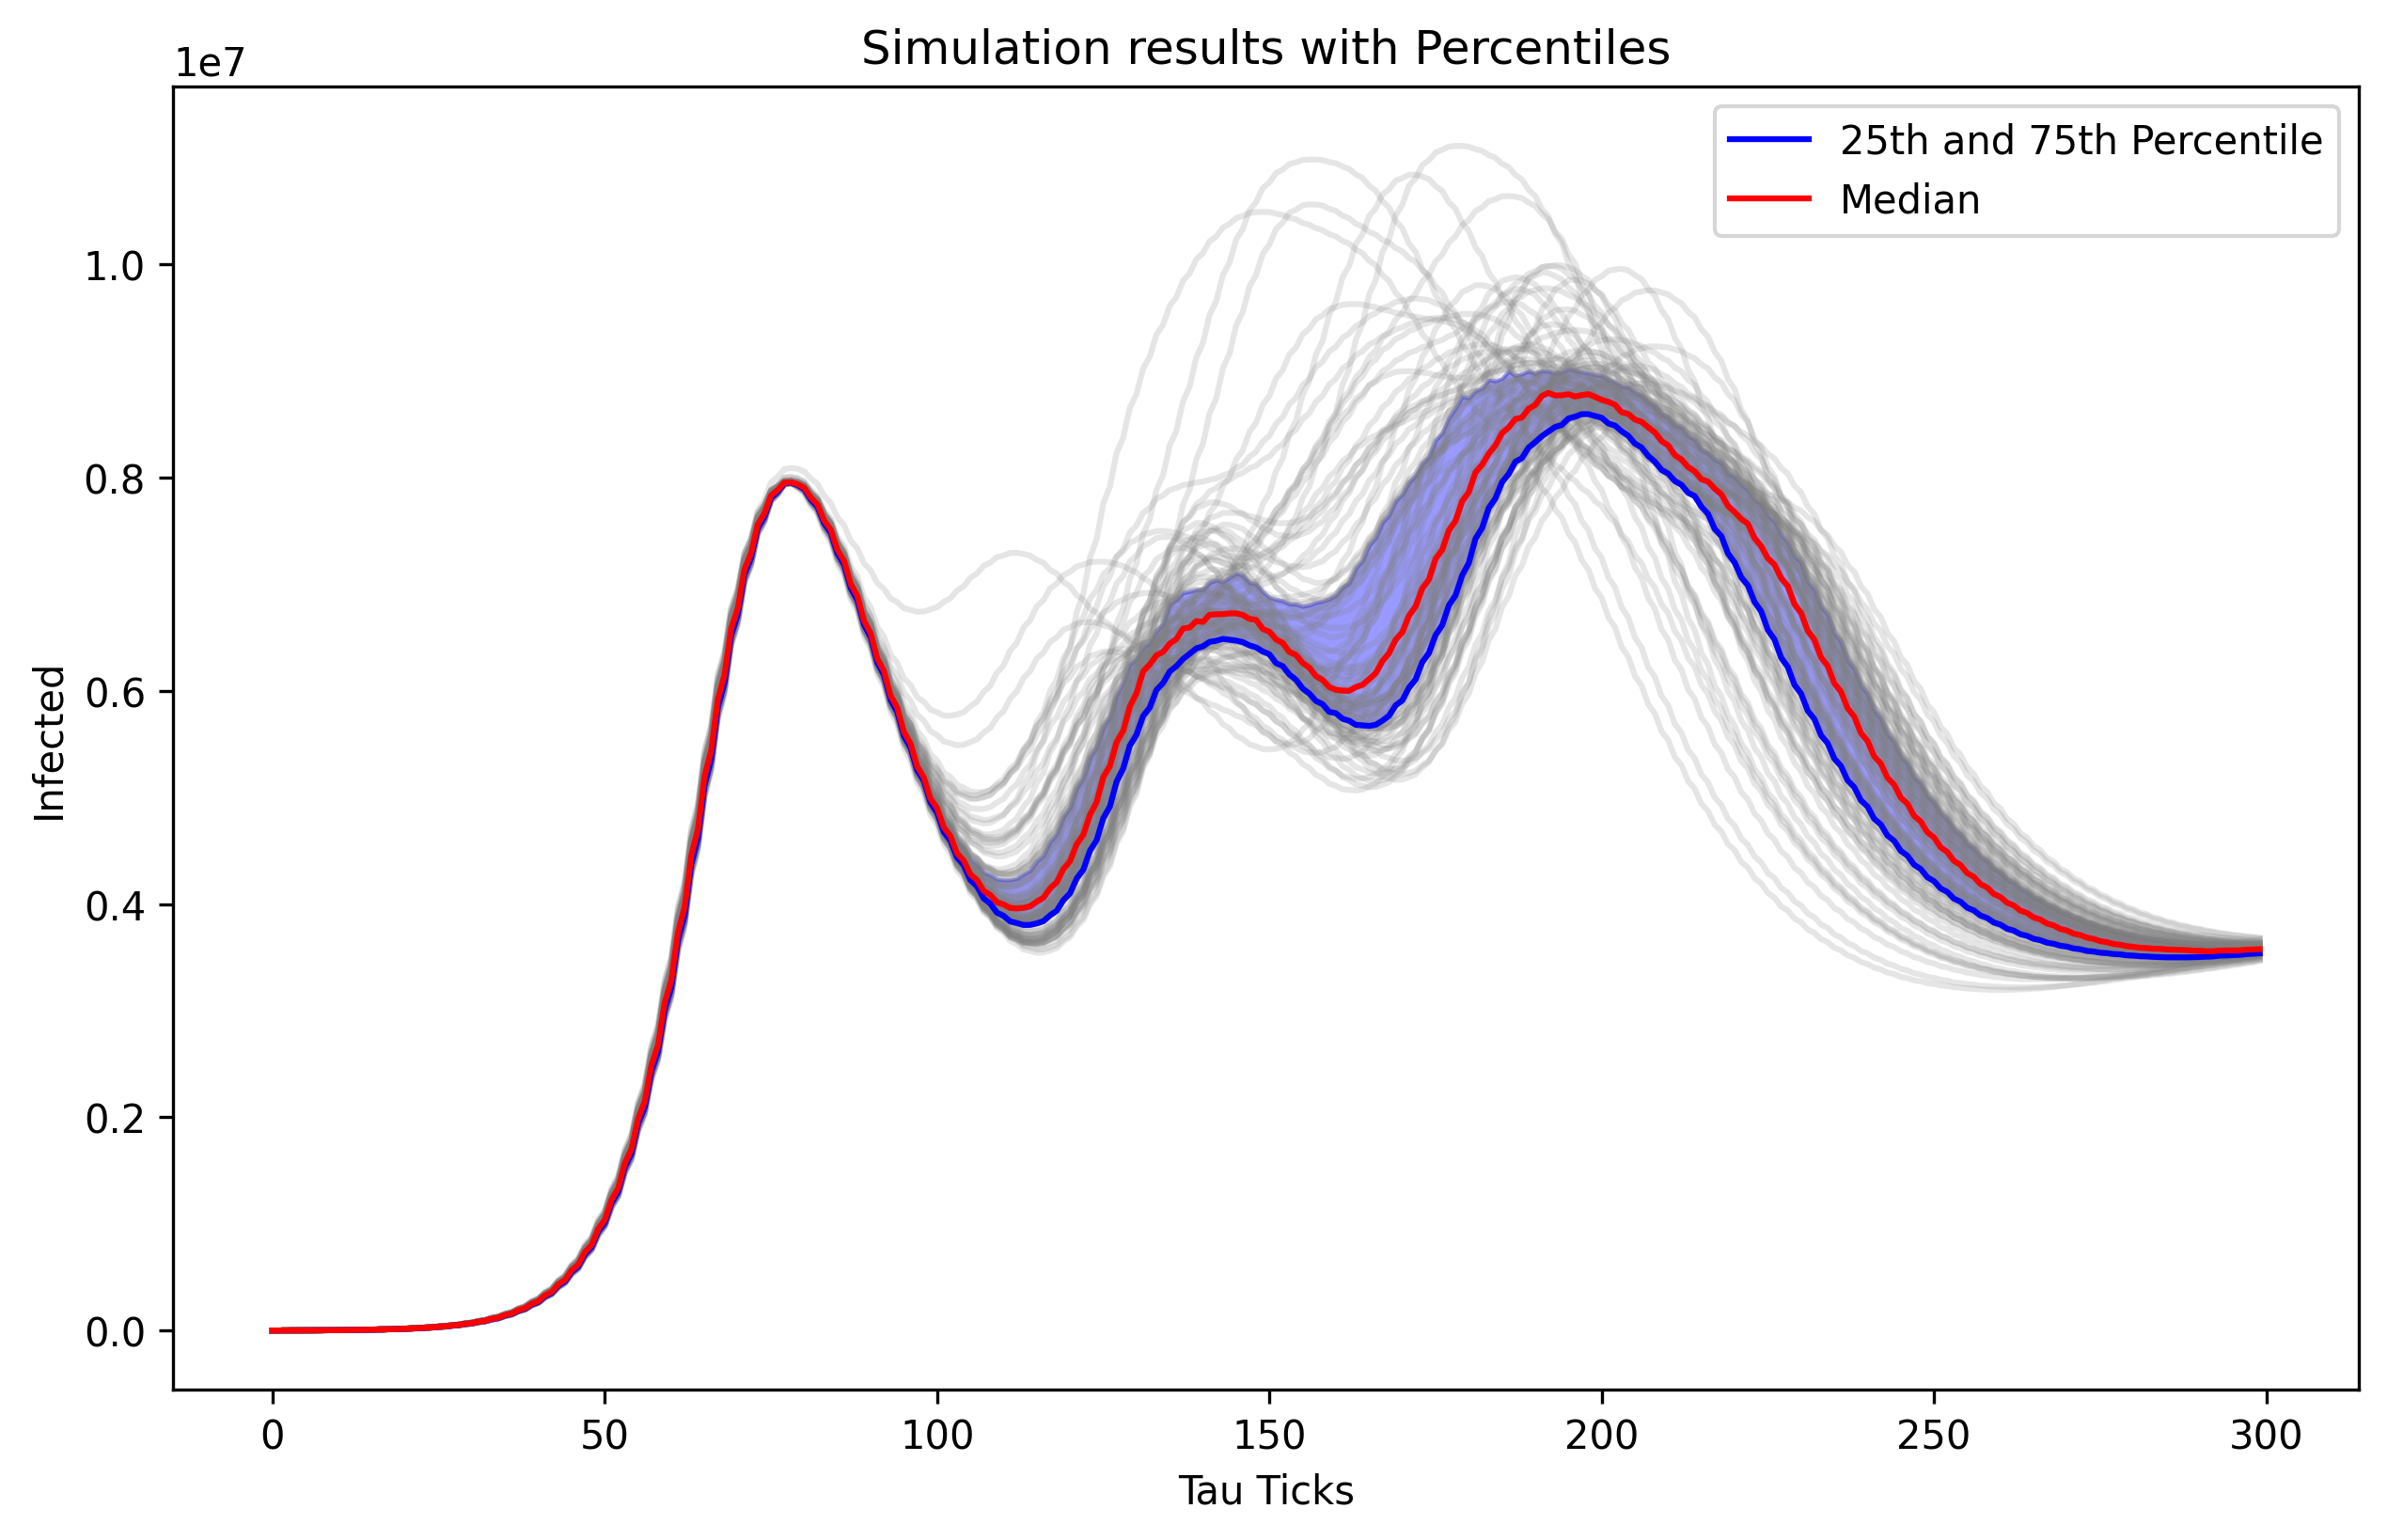

In [114]:
plt.figure(figsize=(10, 6), dpi=300)
for prevalence_array in prevalence_arrays:
    plt.plot(prevalence_array, color='gray', alpha=0.2)

plt.plot(percentiles[0], label='25th and 75th Percentile', color='blue')
plt.fill_between(range(len(percentiles[0])), percentiles[0], percentiles[2], color='blue', alpha=0.4)
plt.plot(percentiles[1], label='Median', color='red')
plt.xlabel('Tau Ticks')
plt.ylabel('Infected')
plt.title('Simulation results with Percentiles')
plt.legend()
plt.show()

Abstract
Brief overview of the purpose of the study
Key methods used (data sources, model creation, comparison with gravity-based model)
Summary of main findings and conclusions

1. Introduction
   Background on the importance of understanding movement patterns in epidemiology
   Overview of existing models (e.g., gravity-based models)
   Motivation for developing a new movement model specific to school movement patterns
   Objectives of the paper
2. Data Sources
   Description of data from the National Center of Education Statistics (NCES)
   Description of U.S. Census data used
   Explanation of how data were pre-processed and integrated
3. Methodology
   3.1 Model Design
   Detailed description of the movement model design
   Theoretical framework and assumptions
   Specific focus on school movement patterns
   3.2 Commuter Matrix Creation
   Explanation of the Python script used to create the commuter matrix
   Description of the spatial scale of Census block groups
   Method of matrix construction and validation
   3.3 Comparison with Gravity-Based Model
   Overview of the gravity-based model used for comparison
   Methodology for comparing the two models
4. Results
   4.1 Movement Model Outcomes
   Presentation of results from the movement model
   Key findings related to school movement patterns
   4.2 Comparison with Gravity-Based Model
   Comparative analysis of results from the movement model and gravity-based model
   Discussion on the performance of both models
5. Discussion
   Interpretation of results
   Implications for epidemiology and public health
   Strengths and limitations of the movement model
   Comparison with existing literature
6. Conclusion
   Summary of key findings
   Contributions to the field of epidemiology
   Future research directions
7. References
   Comprehensive list of all sources cited in the paper
8. Appendices (if necessary)
   Additional data, code snippets, or detailed methodologies
   Acknowledgments
   Any acknowledgments for funding, data sources, or assistance
